# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


# Sales Analyze

## Import library

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the tables from dataset

In [8]:
transactions = pd.read_csv('project_transactions.csv')
demographics = pd.read_csv('hh_demographic.csv')
product = pd.read_csv('product.csv')

In [9]:
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0


In [10]:
demographics

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16
...,...,...,...,...,...,...,...,...
796,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2494
797,45-54,A,75-99K,Homeowner,Unknown,3,1,2496
798,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,2497
799,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2498


In [11]:
product

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


## Read the tables with drop some columns from dataset

In [12]:
transactions = pd.read_csv('project_transactions.csv', usecols = ['household_key','BASKET_ID',
                           'DAY','PRODUCT_ID','QUANTITY','SALES_VALUE'])
demographics = pd.read_csv('hh_demographic.csv', usecols = ['AGE_DESC','INCOME_DESC',
                           'household_key','HH_COMP_DESC'])
product = pd.read_csv('product.csv')

## Cleaning and astype the tables

### product file

In [13]:
product_ck=product.shape
display(product_ck)
print("""
    The data in product file has 92353 rows and 7 columns
""")

(92353, 7)


    The data in product file has 92353 rows and 7 columns



In [247]:
product.info(memory_usage='deep')
print("""
        Check information in table by memory_usage: 31.1 MB
                                        dtype: int64
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 31.1 MB

        Check information in table by memory_usage: 31.1 MB
                                        dtype: int64



In [248]:
product_read=product.head()
display(product_read)
print("""
        Read the data
""")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ



        Read the data



In [252]:
product[['PRODUCT_ID','MANUFACTURER']].info()
print('''
    Check information in table by memory_usage: 1.4 MB
    PRODUCT_ID, MANUFACTURER have data type are Int64
''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PRODUCT_ID    92353 non-null  int32
 1   MANUFACTURER  92353 non-null  int16
dtypes: int16(1), int32(1)
memory usage: 541.3 KB

    Check information in table by memory_usage: 1.4 MB
    PRODUCT_ID, MANUFACTURER have data type are Int64



In [253]:
product_max=product[['PRODUCT_ID','MANUFACTURER']].max()
display(product_max)
print("""
        PRODUCT_ID has max value: 18316298
        MANUFACTURER has max value: 6477 
    ==> from the max value above we choose the data type optimally
""")

PRODUCT_ID      18316298
MANUFACTURER        6477
dtype: int32


        PRODUCT_ID has max value: 18316298
        MANUFACTURER has max value: 6477 
    ==> from the max value above we choose the data type optimally



In [254]:
product[['PRODUCT_ID','MANUFACTURER']] = (product[['PRODUCT_ID','MANUFACTURER']]
                               .astype({'PRODUCT_ID':'int32','MANUFACTURER':'int16'}))
product_info=product[['PRODUCT_ID','MANUFACTURER']].info(memory_usage='deep')
print("""
            PRODUCT_ID from int64 to int32
            MANUFACTURER from int64 to int16
    ==> After astype the data, memory usage: 541.3 KB
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PRODUCT_ID    92353 non-null  int32
 1   MANUFACTURER  92353 non-null  int16
dtypes: int16(1), int32(1)
memory usage: 541.3 KB

            PRODUCT_ID from int64 to int32
            MANUFACTURER from int64 to int16
    ==> After astype the data, memory usage: 541.3 KB



In [255]:
product.info(memory_usage='deep')
print("""
        The product table after astype: 30.2 MB
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int32 
 1   MANUFACTURER          92353 non-null  int16 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int16(1), int32(1), object(5)
memory usage: 30.2 MB

        The product table after astype: 30.2 MB



In [256]:
missing_value=product.isna().sum()
display(missing_value)
print('''
   the data in product file is not Null
''')

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64


   the data in product file is not Null



### hh_demographic

In [257]:
demographic_ck=demographics.shape
display(demographic_ck)
print("""
    the data in hh_demographic table has 801 rows and 8 columns
""")

(801, 4)


    the data in hh_demographic table has 801 rows and 8 columns



In [176]:
demographics.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AGE_DESC       801 non-null    object
 1   INCOME_DESC    801 non-null    object
 2   HH_COMP_DESC   801 non-null    object
 3   household_key  801 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 159.3 KB


In [258]:
hh_max=demographics['household_key'].max()
display(hh_max)
print("""max value of household_key is 2499""")

2499

max value of household_key is 2499


In [259]:
demographics['household_key'].info()
print("""
    check the data of household_key columns by dtypes: int64
                                    memory usage: 6.4 KB
""")

<class 'pandas.core.series.Series'>
RangeIndex: 801 entries, 0 to 800
Series name: household_key
Non-Null Count  Dtype
--------------  -----
801 non-null    int64
dtypes: int64(1)
memory usage: 6.4 KB

    check the data of household_key columns by dtypes: int64
                                    memory usage: 6.4 KB



In [260]:
demographics['household_key']=(demographics['household_key']
                                 .astype({'household_key':'int16'}))
demographic_hk=demographics['household_key'].info(memory_usage='deep')
print("""        household_key from int64 to int16
     ==> afer convert data type: 1.7 KB """)

<class 'pandas.core.series.Series'>
RangeIndex: 801 entries, 0 to 800
Series name: household_key
Non-Null Count  Dtype
--------------  -----
801 non-null    int16
dtypes: int16(1)
memory usage: 1.7 KB
        household_key from int64 to int16
     ==> afer convert data type: 1.7 KB 


In [261]:
demographics.info(memory_usage='deep')
print('''
==> hh_demographic table after convert data type: 348.0 KB
''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AGE_DESC       801 non-null    object
 1   INCOME_DESC    801 non-null    object
 2   HH_COMP_DESC   801 non-null    object
 3   household_key  801 non-null    int16 
dtypes: int16(1), object(3)
memory usage: 154.6 KB

==> hh_demographic table after convert data type: 348.0 KB



In [262]:
missing_value=demographics.isna().sum()
display(missing_value)
print('''
    data in product table is not Null
''')

AGE_DESC         0
INCOME_DESC      0
HH_COMP_DESC     0
household_key    0
dtype: int64


    data in product table is not Null



### project_transactions file

In [263]:
transactions.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            int64  
 3   PRODUCT_ID     int64  
 4   QUANTITY       int64  
 5   SALES_VALUE    float64
dtypes: float64(1), int64(5)
memory usage: 98.3 MB


In [264]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
0,1364,26984896261,1,842930,1,2.19
1,1364,26984896261,1,897044,1,2.99
2,1364,26984896261,1,920955,1,3.09
3,1364,26984896261,1,937406,1,2.50
4,1364,26984896261,1,981760,1,0.60


In [265]:
transactions.max()

household_key    2.099000e+03
BASKET_ID        4.230536e+10
DAY              7.110000e+02
PRODUCT_ID       1.831630e+07
QUANTITY         8.963800e+04
SALES_VALUE      8.400000e+02
dtype: float64

In [266]:
transactions.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE'],
      dtype='object')

In [267]:
transactions = transactions.astype({'household_key':'int16',
                                    'BASKET_ID':'int64',
                                    'DAY':'int16',
                                    'PRODUCT_ID':'int32',
                                    'QUANTITY':'int32',
                                    'SALES_VALUE':'float64'}
                                  )
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
0,1364,26984896261,1,842930,1,2.19
1,1364,26984896261,1,897044,1,2.99
2,1364,26984896261,1,920955,1,3.09
3,1364,26984896261,1,937406,1,2.50
4,1364,26984896261,1,981760,1,0.60
...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99
2146307,1598,42305362535,711,114102,1,8.89
2146308,1598,42305362535,711,133449,1,6.99
2146309,1598,42305362535,711,6923644,1,4.50


In [270]:
transactions.info(memory_usage='deep')
print("""
    data in project_transactions after convert to data: 57.3 MB
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int16  
 1   BASKET_ID      int64  
 2   DAY            int16  
 3   PRODUCT_ID     int32  
 4   QUANTITY       int32  
 5   SALES_VALUE    float64
dtypes: float64(1), int16(2), int32(2), int64(1)
memory usage: 57.3 MB

    data in project_transactions after convert to data: 57.3 MB



In [271]:
# Use the following snippet to create a Date Column.
transactions = (transactions.assign(DATE = (pd.to_datetime("2016", format='%Y') 
                                            + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + "days")))
                                            .drop(["DAY"], axis=1))


In [272]:
transactions

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DATE
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01
...,...,...,...,...,...,...
2146306,1598,42305362535,92130,1,0.99,2017-12-11
2146307,1598,42305362535,114102,1,8.89,2017-12-11
2146308,1598,42305362535,133449,1,6.99,2017-12-11
2146309,1598,42305362535,6923644,1,4.50,2017-12-11


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

In [273]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DATE
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


In [274]:
list(transactions)

['household_key', 'BASKET_ID', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE', 'DATE']

### Plot the sum of sales by month. Are sales growing over time?

In [275]:
tran_sales_by_month = (transactions.groupby(transactions['DATE'].dt.strftime('%m')).
                             agg(Total_sale = ('SALES_VALUE','sum')).reset_index().
                            rename(columns={'DATE':'Month'}).set_index('Month'))
display(tran_sales_by_month)
print("""
     Calculate total revenue by month
""")

,Total_sale
Month,
01,366859.17
02,395373.42
03,511033.05
04,576588.37
05,627148.82
06,593745.41
07,609341.54
08,645621.51
09,619539.15



     Calculate total revenue by month



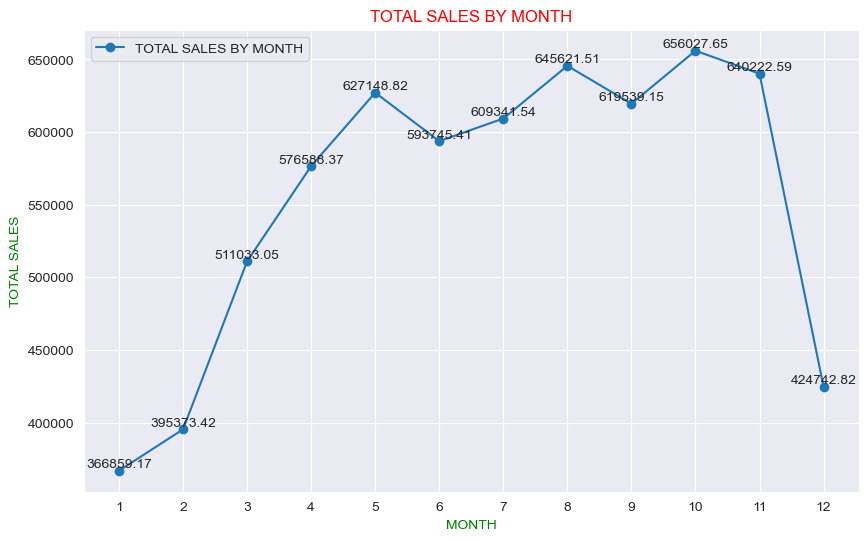

In [276]:
month = range(1, 13)
x = np.arange(len(month))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, tran_sales_by_month['Total_sale'], marker='o', label='TOTAL SALES BY MONTH')

ax.set_xticks(x)
ax.set_xticklabels(month)
ax.set_xlabel('MONTH',c='green')
ax.set_ylabel('TOTAL SALES',c ='green')
ax.set_title('TOTAL SALES BY MONTH',c='red')

for i, value in enumerate(tran_sales_by_month['Total_sale']):
    ax.annotate(f'{value}', (x[i], value), ha='center', va='bottom')

plt.legend()
plt.show()


### Next, plot the same series after filtering down to dates April 2016 and October 2017.

In [277]:
trans_04_2016_to_10_2017 = (transactions.groupby(transactions["DATE"].dt.strftime('%Y-%m')).
                                            agg(Total_sale = ('SALES_VALUE','sum')))
display(trans_04_2016_to_10_2017)
print('''
                  calculate the revenue and groupby the data by year and month
''')  

,Total_sale
DATE,
2016-01,46557.97
2016-02,97315.16
2016-03,185521.82
2016-04,267801.38
2016-05,298319.14
2016-06,288952.45
2016-07,296488.02
2016-08,303951.35
2016-09,302040.56



                  calculate the revenue and groupby the data by year and month



In [278]:
trans_04_2016_to_10_2017 = trans_04_2016_to_10_2017.loc['2016-04':'2017-10']
display(trans_04_2016_to_10_2017)
print('''
                  filtering the data from Apr 2016 to October 2017
''')  

,Total_sale
DATE,
2016-04,267801.38
2016-05,298319.14
2016-06,288952.45
2016-07,296488.02
2016-08,303951.35
2016-09,302040.56
2016-10,309962.42
2016-11,304764.41
2016-12,310456.27



                  filtering the data from Apr 2016 to October 2017



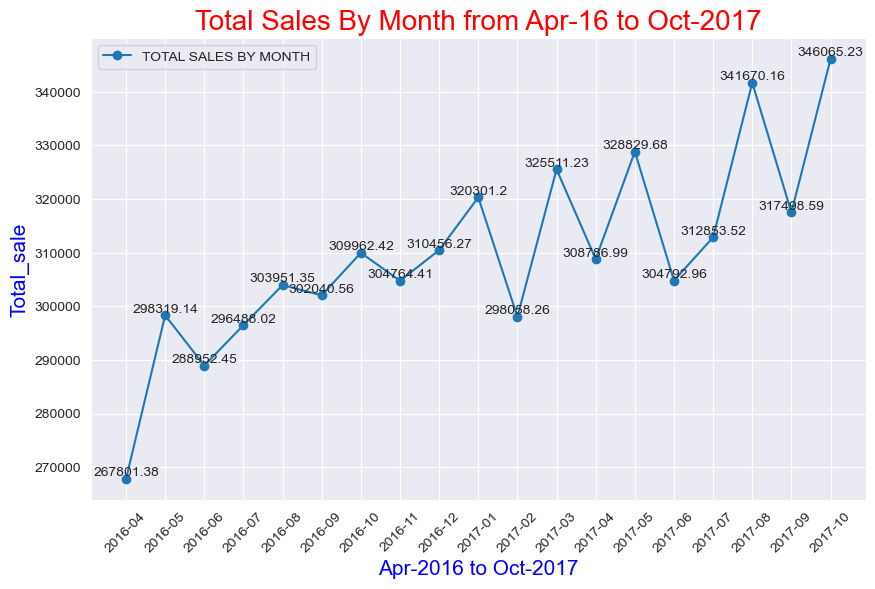

In [280]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(trans_04_2016_to_10_2017.index, trans_04_2016_to_10_2017['Total_sale'], marker='o', label='TOTAL SALES BY MONTH')

ax.set_xticks(trans_04_2016_to_10_2017.index)
ax.set_xlabel('Apr-2016 to Oct-2017',fontsize =15, c = 'blue')
ax.set_ylabel('Total_sale',fontsize =15, c = 'blue')
ax.set_title('Total Sales By Month from Apr-16 to Oct-2017',fontsize =20, c = 'red')
ax.xaxis.set_tick_params(rotation=45)
for i, value in enumerate(trans_04_2016_to_10_2017['Total_sale']):
    ax.annotate(f'{value}', (trans_04_2016_to_10_2017.index[i], value), ha='center', va='bottom')

plt.legend()
plt.show()


* Plot the sum of monthly sales in 2016 vs the monthly sales 2017.

# Cách 1

In [281]:
transactions_2016 = (transactions[transactions["DATE"].dt.strftime("%Y") == '2016'])
display(transactions_2016)
print('''
                 Filtering tran_total_sales table by 2016
''')

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DATE
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01
...,...,...,...,...,...,...
998513,1675,32452891607,6381881,1,0.99,2016-12-31
998514,1675,32452891607,6408076,1,3.19,2016-12-31
998515,1675,32452891607,9530417,1,3.49,2016-12-31
998516,1675,32452891607,9555168,1,1.39,2016-12-31



                 Filtering tran_total_sales table by 2016



In [282]:
transactions_2016 = ((transactions_2016.groupby(transactions_2016['DATE'].dt.strftime('%m')).
                        agg(Total_sale = ('SALES_VALUE','sum')).reset_index()).
                        rename(columns={'DATE':'Monthly'}).set_index('Monthly'))
display(transactions_2016)
print('''
              groupby transactions_2016 by month
''')

,Total_sale
Monthly,
01,46557.97
02,97315.16
03,185521.82
04,267801.38
05,298319.14
06,288952.45
07,296488.02
08,303951.35
09,302040.56



              groupby transactions_2016 by month



In [283]:
transactions_2017 = (transactions[transactions["DATE"].dt.strftime("%Y") == '2017'])
display(transactions_2017)
print('''
            Filtering tran_total_sales table by 2017
''')              

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DATE
984764,637,32408907243,926905,1,3.34,2017-01-01
984765,637,32408907243,1037840,1,3.84,2017-01-01
984766,637,32408907243,1114811,1,2.79,2017-01-01
987200,307,32444540925,916767,2,1.18,2017-01-01
987201,1762,32444545506,845705,2,3.98,2017-01-01
...,...,...,...,...,...,...
2146306,1598,42305362535,92130,1,0.99,2017-12-11
2146307,1598,42305362535,114102,1,8.89,2017-12-11
2146308,1598,42305362535,133449,1,6.99,2017-12-11
2146309,1598,42305362535,6923644,1,4.50,2017-12-11



            Filtering tran_total_sales table by 2017



In [284]:
transactions_2017 = ((transactions_2017.groupby(transactions_2017['DATE'].dt.strftime('%m')).
                        agg(Total_sale = ('SALES_VALUE','sum')).reset_index()).
                        rename(columns={'DATE':'Monthly'}).set_index('Monthly'))
display(transactions_2017)
print('''
              groupby transactions_2017 by month
''')

,Total_sale
Monthly,
01,320301.20
02,298058.26
03,325511.23
04,308786.99
05,328829.68
06,304792.96
07,312853.52
08,341670.16
09,317498.59



              groupby transactions_2017 by month



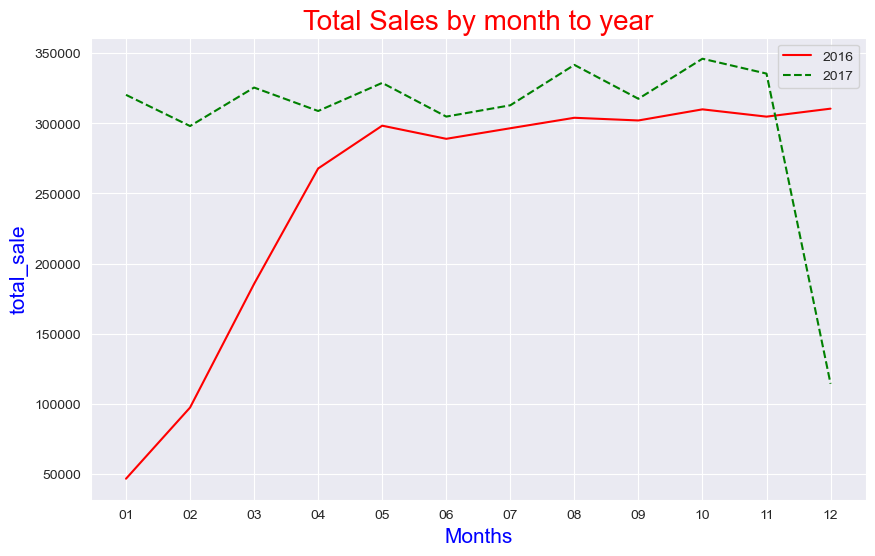

In [285]:
fig = plt.figure(figsize=(10,6))
plt.plot(transactions_2016, 'r-')
plt.plot(transactions_2017, 'g--')
plt.legend(['2016','2017'])
plt.xlabel("Months", fontsize =15, c = 'blue')
plt.ylabel("total_sale", fontsize = 15, c ='blue')
plt.title("Total Sales by month to year", fontsize =20, c = 'red')
plt.show()

### Finally, plot total sales by day of week.

In [287]:
sales_by_dayofweek = (transactions.assign(DAYOFWEEK = pd.to_datetime(transactions['DATE']).dt.dayofweek,
                                        DAY_NAME = pd.to_datetime(transactions['DATE']).dt.day_name()                                     )
                        )
display(sales_by_dayofweek)


,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DATE,DAYOFWEEK,DAY_NAME
0,1364,26984896261,842930,1,2.19,2016-01-01,4,Friday
1,1364,26984896261,897044,1,2.99,2016-01-01,4,Friday
2,1364,26984896261,920955,1,3.09,2016-01-01,4,Friday
3,1364,26984896261,937406,1,2.50,2016-01-01,4,Friday
4,1364,26984896261,981760,1,0.60,2016-01-01,4,Friday
...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,92130,1,0.99,2017-12-11,0,Monday
2146307,1598,42305362535,114102,1,8.89,2017-12-11,0,Monday
2146308,1598,42305362535,133449,1,6.99,2017-12-11,0,Monday
2146309,1598,42305362535,6923644,1,4.50,2017-12-11,0,Monday


In [288]:
sales_by_dayofweek=sales_by_dayofweek.groupby(['DAYOFWEEK', 'DAY_NAME']).agg({'SALES_VALUE':'sum'})
display(sales_by_dayofweek)
print("""
        Calculate total revenue by 'DAYOFWEEK', 'DAY_NAME' columns
""")

,,SALES_VALUE
DAYOFWEEK,DAY_NAME,
0,Monday,1136462.30
1,Tuesday,1172457.99
2,Wednesday,920957.10
3,Thursday,839884.07
4,Friday,832957.98
5,Saturday,833944.67
6,Sunday,929579.39



        Calculate total revenue by 'DAYOFWEEK', 'DAY_NAME' columns



In [289]:
sales_by_dayofweek = sales_by_dayofweek.reset_index()

In [290]:
sales_by_dayofweek

,DAYOFWEEK,DAY_NAME,SALES_VALUE
0,0,Monday,1136462.30
1,1,Tuesday,1172457.99
2,2,Wednesday,920957.10
3,3,Thursday,839884.07
4,4,Friday,832957.98
5,5,Saturday,833944.67
6,6,Sunday,929579.39


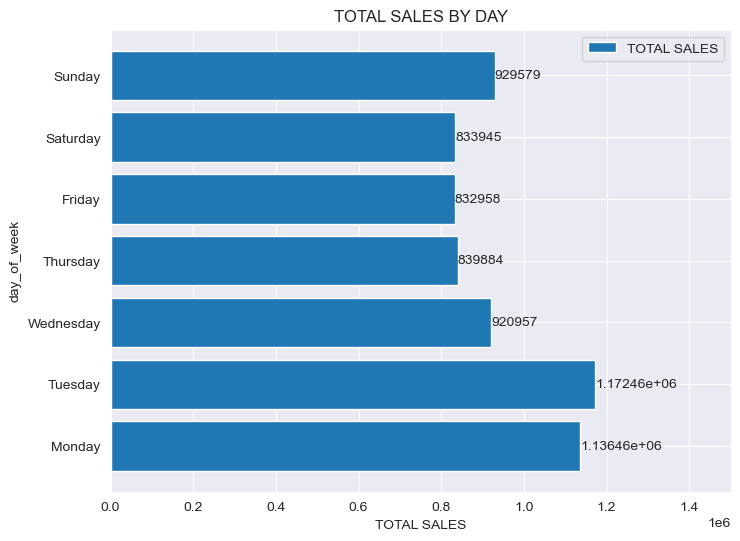


                    Biểu đồ thể hiện tổng số lượng bán hàng của các thứ trong tuần



In [291]:
day = sales_by_dayofweek['DAY_NAME']
fix, ax = plt.subplots(figsize=(8,6))
ax.barh(day, 
       sales_by_dayofweek['SALES_VALUE'], 
        label='TOTAL SALES'
       )
ax.set_yticks(day)
ax.set_xlabel('TOTAL SALES')
ax.set_ylabel('day_of_week')
ax.set_yticklabels(day)
ax.set_title('TOTAL SALES BY DAY')
for bar in ax.containers:
    ax.bar_label(bar)
ax.set_xlim(0, 1500000)
plt.legend()
plt.show()
print("""
                    Biểu đồ thể hiện tổng số lượng bán hàng của các thứ trong tuần
""")

# DEMOGRAPHICS


In [292]:
demographics

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16
...,...,...,...,...
796,35-44,50-74K,2 Adults No Kids,2494
797,45-54,75-99K,Unknown,2496
798,45-54,35-49K,Single Male,2497
799,25-34,50-74K,2 Adults No Kids,2498


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.

In [293]:
transactions.groupby("household_key").agg(Total_sale=("SALES_VALUE","sum"))

,Total_sale
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.

In [15]:
tran_demor = transactions.merge(demographics,
                               how = "inner",
                               left_on = "household_key",
                               right_on = "household_key")
tran_demor

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1364,26984896261,1,842930,1,2.19,65+,100-124K,Single Female
1,1364,26984896261,1,897044,1,2.99,65+,100-124K,Single Female
2,1364,26984896261,1,920955,1,3.09,65+,100-124K,Single Female
3,1364,26984896261,1,937406,1,2.50,65+,100-124K,Single Female
4,1364,26984896261,1,981760,1,0.60,65+,100-124K,Single Female
...,...,...,...,...,...,...,...,...,...
1161570,540,42250646707,707,9420286,2,2.00,25-34,50-74K,Single Female
1161571,540,42250646707,707,9652066,1,3.69,25-34,50-74K,Single Female
1161572,540,42250646707,707,12781725,1,2.50,25-34,50-74K,Single Female
1161573,540,42250646707,707,15625746,1,3.19,25-34,50-74K,Single Female


In [295]:
hh_tran_demor = tran_demor.groupby("household_key").agg(Total_sale=("SALES_VALUE","sum"))
hh_tran_demor

,Total_sale
household_key,
1,4330.16
7,3400.05
8,5534.97
13,13190.92
16,1512.02
...,...
2087,7832.74
2088,4905.71
2092,2290.54


In [296]:
tran_demor_age = tran_demor.groupby(tran_demor["AGE_DESC"]).agg(Total_sale=("SALES_VALUE","sum"))
tran_demor_age

,Total_sale
AGE_DESC,
19-24,182991.03
25-34,635955.55
35-44,986670.19
45-54,1328371.19
55-64,258446.21
65+,260456.19


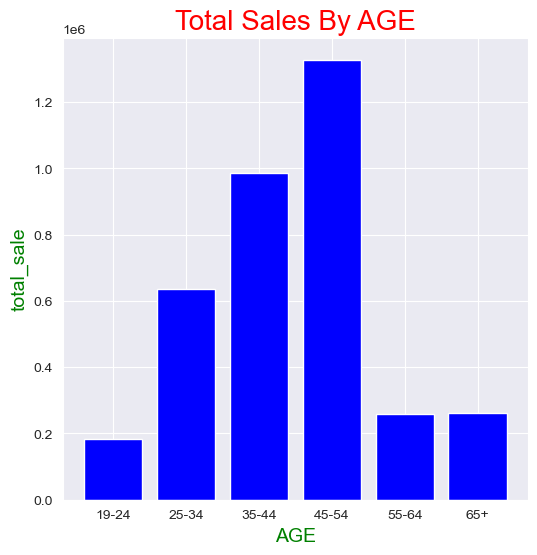

In [297]:
fig = plt.figure(figsize=(6,6))
plt.bar(x = tran_demor_age.index, height = tran_demor_age["Total_sale"], color = "Blue")
plt.title("Total Sales By AGE", fontsize =20, c = 'red')
plt.xlabel("AGE", fontsize =14, c = 'green')
plt.ylabel("total_sale", fontsize = 14, c ='green')
plt.show()

In [298]:
tran_demor_Income = tran_demor.groupby(tran_demor["INCOME_DESC"]).agg(Total_sale=("SALES_VALUE","sum"))
tran_demor_Income

,Total_sale
INCOME_DESC,
100-124K,176701.11
125-149K,243900.83
15-24K,274757.94
150-174K,199350.78
175-199K,50970.79
200-249K,24232.17
25-34K,297183.42
250K+,51715.16
35-49K,706011.17


* Arrange the INCOME_DESC according to ascending by 'CategoricalDtype'

In [299]:
from pandas.api.types import CategoricalDtype
Income_Categ = CategoricalDtype(['Under 15K','15-24K','25-34K','35-49K','50-74K','75-99K',
                                 '100-124K','125-149K','150-174K','175-199K','200-249K','250K+'],ordered = True)

* Convert data type of 'INCOME_DESC' column from tran_demor_Income table to 'CategoricalDtype' type.

In [300]:
tran_demor_Income.index=tran_demor_Income.index.astype(Income_Categ)
tran_demor_Income.index

CategoricalIndex(['100-124K', '125-149K', '15-24K', '150-174K', '175-199K',
                  '200-249K', '25-34K', '250K+', '35-49K', '50-74K', '75-99K',
                  'Under 15K'],
                 categories=['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K', '100-124K', '125-149K', ...], ordered=True, dtype='category', name='INCOME_DESC')

* Sort index in ascending order

In [301]:
tran_demor_Income.sort_index(inplace = True)
tran_demor_Income

,Total_sale
INCOME_DESC,
Under 15K,282448.50
15-24K,274757.94
25-34K,297183.42
35-49K,706011.17
50-74K,878344.14
75-99K,467274.35
100-124K,176701.11
125-149K,243900.83
150-174K,199350.78


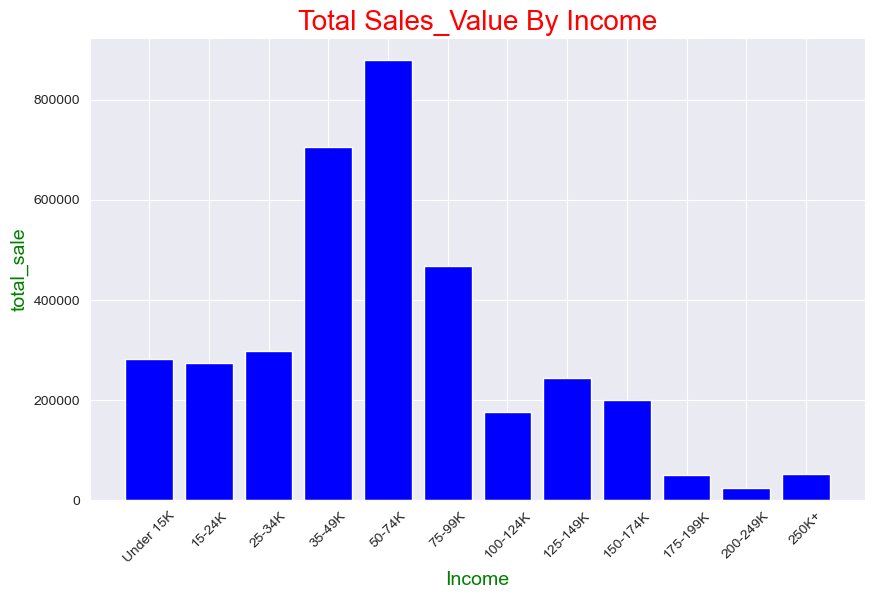

In [302]:
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(x = tran_demor_Income.index, height = tran_demor_Income["Total_sale"], color = "Blue")
plt.title("Total Sales_Value By Income", fontsize =20, c = 'red')
plt.xlabel("Income", fontsize =14, c = 'green')
plt.ylabel("total_sale", fontsize = 14, c ='green')
ax.xaxis.set_tick_params(rotation=45)
plt.show()

* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?

In [16]:
demographics_household = tran_demor.groupby(tran_demor['household_key']).agg(Total_sale = ('SALES_VALUE','sum'))
demographics_household.sort_values('Total_sale', ascending = False, inplace = True)
display(demographics_household)
print("""
                        we are groupby total revenue by Households
""")

,Total_sale
household_key,
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
...,...
1429,818.56
1604,818.41
460,760.45



                        we are groupby total revenue by Households



In [305]:
demographics_household.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 1609 to 593
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Total_sale  668 non-null    float64
dtypes: float64(1)
memory usage: 10.4 KB


In [306]:
demographics_hh_sales = (demographics_household.merge(demographics, how="inner", 
                                                      left_on="household_key", right_on="household_key")
                        )
display(demographics_hh_sales)

,household_key,Total_sale,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1609,27859.68,45-54,125-149K,2 Adults Kids
1,1453,21661.29,45-54,125-149K,2 Adults Kids
2,1430,20352.99,35-44,35-49K,2 Adults Kids
3,718,19299.86,45-54,25-34K,2 Adults Kids
4,707,19194.42,25-34,100-124K,2 Adults Kids
...,...,...,...,...,...
663,1429,818.56,45-54,35-49K,Single Female
664,1604,818.41,35-44,35-49K,2 Adults No Kids
665,460,760.45,65+,25-34K,Single Female
666,1135,748.88,45-54,50-74K,Unknown


In [308]:
demographics_hh_sales_pivot = demographics_hh_sales.pivot_table(index = "AGE_DESC", columns = "HH_COMP_DESC", 
                                          values = "Total_sale", aggfunc = "mean", margins = True)
display(demographics_hh_sales_pivot)
print("""                              
              Using the pivot table to statictis the revenue by demographics
      """)


HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


                              
              Using the pivot table to statictis the revenue by demographics
      


In [309]:
demographics_hh_sales_pivot.style.background_gradient(cmap="RdYlGn", axis=None)

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


* Only read in product_id and department from product

In [310]:
product = product[['PRODUCT_ID','DEPARTMENT']]
display(product)
print('''
    Read the product table only 'PRODUCT_ID','DEPARTMENT' columns
''')

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY
...,...,...
92348,18293142,DRUG GM
92349,18293439,DRUG GM
92350,18293696,DRUG GM
92351,18294080,DRUG GM



    Read the product table only 'PRODUCT_ID','DEPARTMENT' columns



* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

In [4]:
tran_demor_product = (transactions.merge(demographics, how="inner", left_on="household_key", right_on="household_key")
                               .merge(product, how="inner", left_on="PRODUCT_ID", right_on="PRODUCT_ID")
                    )
display(tran_demor_product)
                  
print('''
                           join all tables by iner join
''')

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,...,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
1,304,27950201718,81,842930,1,1.67,333,-0.52,12,0.0,...,Unknown,2 Adults No Kids,2,None/Unknown,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
2,575,34186568032,485,842930,1,1.67,433,-0.62,70,0.0,...,Unknown,Single Female,1,None/Unknown,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
3,77,28023861855,87,842930,3,5.00,346,-1.57,13,0.0,...,Homeowner,2 Adults Kids,5+,3+,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
4,454,42136182098,699,842930,1,1.67,391,-0.62,101,0.0,...,Unknown,Single Male,1,None/Unknown,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161570,540,41413346731,645,913709,1,10.99,299,0.00,93,0.0,...,Homeowner,Single Female,1,None/Unknown,1578,DRUG GM,National,MAGAZINE,NEWS-MAGAZINE,
1161571,540,41587471481,658,1024615,1,11.99,299,0.00,95,0.0,...,Homeowner,Single Female,1,None/Unknown,624,DRUG GM,National,VITAMINS,VITAMIN - INDIVIDUAL,
1161572,540,41587471481,658,9831733,1,0.00,299,-10.49,95,0.0,...,Homeowner,Single Female,1,None/Unknown,624,DRUG GM,National,VITAMINS,VITAMIN - MULTIPLE COMBIN,
1161573,540,41834711355,677,830676,1,8.99,299,-2.00,97,0.0,...,Homeowner,Single Female,1,None/Unknown,2321,NUTRITION,National,FITNESS&DIET,NUT SUPP-PROTEIN-FOOD STAMPABL,1.1 LB



                           join all tables by iner join



* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?

In [5]:
sales_by_age_depart = (tran_demor_product.pivot_table(index='DEPARTMENT', 
                                              columns='AGE_DESC', 
                                              values='SALES_VALUE', 
                                              aggfunc='sum', fill_value=0))
display(sales_by_age_depart)
print('''
                       create the pivot table and calculate toal revenue by DEPARTMENT AND AGE_DESC columns
''')

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.00,0.00,0.00,0.00,0.00,0.00
AUTOMOTIVE,11.64,21.25,72.58,55.92,0.00,16.37
CHEF SHOPPE,81.30,134.16,348.53,418.24,80.86,149.24
CNTRL/STORE SUP,2.00,0.00,1.00,9.95,2.00,0.10
COSMETICS,698.63,2273.03,4362.02,5187.57,986.26,600.90
COUP/STR & MFG,7.49,48.42,121.20,154.55,40.68,20.49
DAIRY DELI,3.80,3.85,7.39,16.75,3.14,1.94
DELI,4043.30,18181.94,34577.29,44334.22,9850.54,10462.33
DELI/SNACK BAR,0.00,0.00,6.98,1.56,0.00,3.31



                       create the pivot table and calculate toal revenue by DEPARTMENT AND AGE_DESC columns



In [6]:
sales_by_age_depart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries,   to VIDEO
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   19-24   38 non-null     float64
 1   25-34   38 non-null     float64
 2   35-44   38 non-null     float64
 3   45-54   38 non-null     float64
 4   55-64   38 non-null     float64
 5   65+     38 non-null     float64
dtypes: float64(6)
memory usage: 2.1+ KB


In [313]:
heat_map_age_dep = sales_by_age_depart.style.background_gradient(axis=1, low=0.45, high=1.0)  
heat_map_age_dep

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,0.000000,16.370000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000
DELI/SNACK BAR,0.000000,0.000000,6.980000,1.560000,0.000000,3.310000


# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [318]:
heat_map_age_dep.to_excel("Revenue with household1.xlsx", sheet_name="sales_by_age_product"),
demographics_hh_sales_pivot.to_excel("Revenue with household2.xlsx", sheet_name="sales_by_demographic"),
tran_demor_Income.to_excel("Revenue with household3.xlsx", sheet_name="sales_by_Income"),
tran_demor_age.to_excel("Revenue with household4.xlsx", sheet_name="sales_by_age"),
sales_by_dayofweek.to_excel("Revenue with household5.xlsx", sheet_name="sales_by_dayofweek"),
tran_sales_by_month.to_excel("Revenue with household6.xlsx", sheet_name="sales_by_age_month"),
trans_04_2016_to_10_2017.to_excel("Revenue with household7.xlsx", sheet_name="sales_by_year_month")
demographics_household.to_excel("Revenue with household8.xlsx", sheet_name="sales_by_household")